In [51]:
import pandas as pd
import numpy as np

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Handling 1D data

In [58]:
df_1d = pd.read_csv('../data/data_1d.csv', header=None)

In [59]:
df_1d.head(2)

,0,1
0,95.724162,197.179636
1,35.757619,67.590670


In [60]:
X = df_1d[0].astype(float).values    #getting 1st col, converting to float, changing to numpy array 

In [61]:
Y = df_1d[1].astype(float).values    #getting 2nd col, converting to float, changing to numpy array 

##### Plot the data

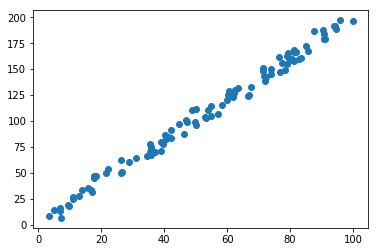

In [62]:
plt.scatter(X,Y)
plt.show()

##### apply the equations we learnt to calculate a and b

In [63]:
denominator = X.dot(X) - X.mean() * X.sum()

In [64]:
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator

In [65]:
b = ( Y.mean() * X.dot(X) - X.mean()*X.dot(Y) ) / denominator

In [66]:
Yhat = a*X + b

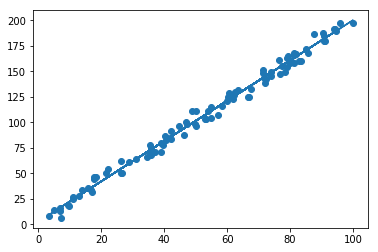

In [67]:
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

##### calculate r-squared

In [68]:
d1 = Y - Yhat
d2 = Y - Y.mean()    #numpy handles vector minus scalar by subtracting scalar value from all vector elements

In [69]:
r2 = 1 - d1.dot(d1) / d2.dot(d2)

In [71]:
r2    #value closer to 1 signifies our model is predicting correctly.

0.9911838202977805

### Moore's Law

In [72]:
import re

In [100]:
X_moore = []
Y_moore = []

In [101]:
non_decimal = re.compile(r'[^\d]+')

In [102]:
for line in open('../data/moore.csv'):
    r = line.split('\t')
    x = int(non_decimal.sub('',r[2].split('[')[0]))
    y = int(non_decimal.sub('',r[1].split('[')[0]))
    X_moore.append(x)
    Y_moore.append(y)
    
X_moore = np.array(X_moore)
Y_moore = np.array(Y_moore)

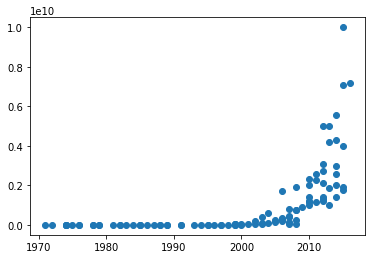

In [103]:
plt.scatter(X_moore, Y_moore)
plt.show()

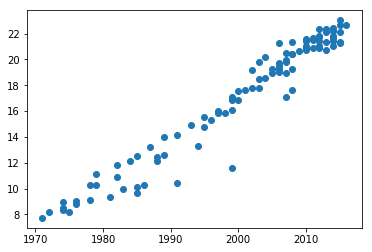

In [104]:
Y_moore_log = np.log(Y_moore)
plt.scatter(X_moore, Y_moore_log)
plt.show()

In [105]:
denominator = X_moore.dot(X_moore) - X_moore.mean() * X_moore.sum()
a = ( X_moore.dot(Y_moore_log) - Y_moore_log.mean()*X_moore.sum() ) / denominator
b = ( Y_moore_log.mean() * X_moore.dot(X_moore) - X_moore.mean() * X_moore.dot(Y_moore_log) ) / denominator

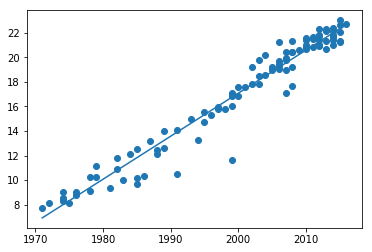

In [106]:
Yhat_moore = a*X_moore + b

plt.scatter(X_moore, Y_moore_log)
plt.plot(X_moore, Yhat_moore)
plt.show()

In [107]:
# determine how good the model is by computing the r-squared
d1 = Y_moore_log - Yhat_moore
d2 = Y_moore_log - Y_moore_log.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576


In [108]:
# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

time to double: 1.9745331723797188 years


### ========================================================================================

# Handling 2D data (data with 2 features)

In [120]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_2d = pd.read_csv('../data/data_2d.csv', header=None)

In [110]:
df_2d.head(2)

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472


In [118]:
df_2d.insert(loc=0, column='ones', value=1)

In [119]:
df_2d.head(2)

,ones,0,1,2
0,1,17.930201,94.520592,320.259530
1,1,97.144697,69.593282,404.634472


In [149]:
X = df_2d.iloc[:,0:3]
Y = df_2d.iloc[:,-1]

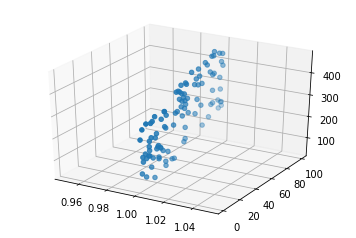

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], Y)
#ax.scatter(df_2d.iloc[:,0], df_2d.iloc[:,1], df_2d.iloc[:,3])
plt.show()

In [152]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

In [153]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9980040612475777
